## Section 3: Hierarchal modeling
贝叶斯模型的一个关键优点是易于实现层次模型的灵活性。这节将要实现和比较一个合并pooled和部分合并partially pooled模型。

In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import scipy
import scipy.stats as stats
import seaborn.apionly as sns

from IPython.display import Image
from sklearn import preprocessing


%matplotlib inline
plt.style.use('bmh')
colors = ['#348ABD', '#A60628', '#7A68A6', '#467821', '#D55E00', 
          '#CC79A7', '#56B4E9', '#009E73', '#F0E442', '#0072B2']

messages = pd.read_csv('data/hangout_chat_data.csv')

### Model Pooling
让我们探索一种对hangout数据集中回应时间字段的不同建模方法。我的直觉是会根据我聊天的对象来决定回复的速度。我更倾向于快速回复女朋友的消息而不是普通朋友。因此，我可以决定对每个会话独立建模，估计每个会话conversation $i$的参数$\mu_i$和$\alpha_i$。

我们必须考虑的一个情况是，一些会话相对其他会话只有少量的信息messages。因此，我们对含有少量信息的会话进行回应时间的估计时，相对有大量信息的会话，需要更高等级的不确定性(higher degree of uncertainty)。下面的图展示了每个会话的样本数量的差异性。

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

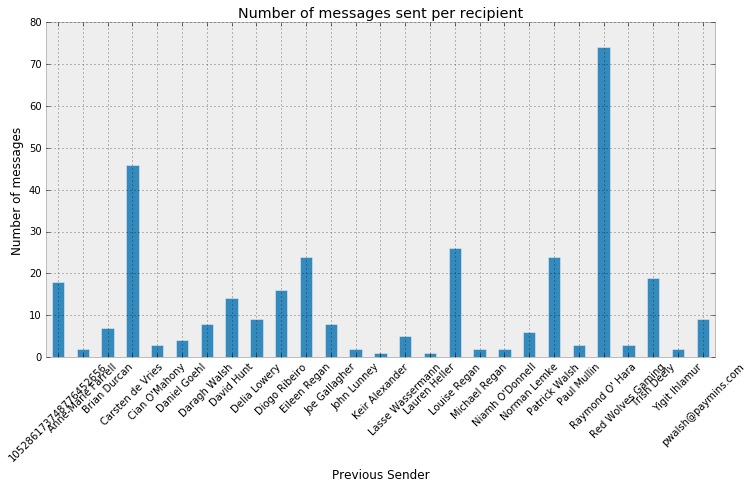

In [7]:
ax = messages.groupby('prev_sender')['conversation_id'].size().plot(
    kind='bar', figsize=(12,6), title='Number of messages sent per recipient', color=colors[0])
ax.set_xlabel('Previous Sender')
ax.set_ylabel('Number of messages')
plt.xticks(rotation=45)

For each message j and each conversation i, we represent the model as:

$$y_{ji} \sim NegBinomial(\mu_i, \alpha_i)$$
$$\mu_i = Uniform(0, 100)$$
$$\alpha_i = Uniform(0, 100)$$

In [8]:
indiv_traces = {}

# 转换类别变量到整数
le = preprocessing.LabelEncoder()
participants_idx = le.fit_transform(messages['prev_sender'])
participants = le.classes_
n_participants = len(participants)

for p in participants:
    with pm.Model() as model:
        alpha = pm.Uniform('alpha', lower=0, upper=100)
        mu = pm.Uniform('mu', lower=0, upper=100)
        
        data = messages[messages['prev_sender'] == p]['time_delay_seconds'].values
        y_est = pm.NegativeBinomial('y_est', mu=mu, alpha=alpha, observed=data)
        
        y_pred = pm.NegativeBinomial('y_pred', mu=mu, alpha=alpha)
        
        start = pm.find_MAP()
        step = pm.Metropolis()
        trace = pm.sample(20000, step, start=start, progressbar=True)
        
        indiv_traces[p] = trace

Optimization terminated successfully.
         Current function value: 78.049625
         Iterations: 9
         Function evaluations: 18
         Gradient evaluations: 18


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20500/20500 [02:01<00:00, 168.41it/s]


Optimization terminated successfully.
         Current function value: 17.353356
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20500/20500 [01:22<00:00, 249.38it/s]


Optimization terminated successfully.
         Current function value: 38.789382
         Iterations: 10
         Function evaluations: 15
         Gradient evaluations: 15


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20500/20500 [01:34<00:00, 216.21it/s]


Optimization terminated successfully.
         Current function value: 192.109590
         Iterations: 10
         Function evaluations: 22
         Gradient evaluations: 22


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20500/20500 [03:34<00:00, 95.50it/s]


Optimization terminated successfully.
         Current function value: 21.874049
         Iterations: 7
         Function evaluations: 14
         Gradient evaluations: 14


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20500/20500 [01:26<00:00, 237.25it/s]


Optimization terminated successfully.
         Current function value: 24.609459
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20500/20500 [01:28<00:00, 230.44it/s]


Optimization terminated successfully.
         Current function value: 41.874177
         Iterations: 10
         Function evaluations: 15
         Gradient evaluations: 15


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20500/20500 [01:43<00:00, 198.38it/s]


Optimization terminated successfully.
         Current function value: 68.015498
         Iterations: 10
         Function evaluations: 25
         Gradient evaluations: 20


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20500/20500 [02:00<00:00, 169.70it/s]


Optimization terminated successfully.
         Current function value: 45.749610
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20500/20500 [01:41<00:00, 202.87it/s]


Optimization terminated successfully.
         Current function value: 74.182915
         Iterations: 9
         Function evaluations: 16
         Gradient evaluations: 16


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20500/20500 [01:59<00:00, 171.99it/s]


Optimization terminated successfully.
         Current function value: 105.827623
         Iterations: 10
         Function evaluations: 19
         Gradient evaluations: 19


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20500/20500 [02:18<00:00, 147.77it/s]


Optimization terminated successfully.
         Current function value: 41.192182
         Iterations: 7
         Function evaluations: 14
         Gradient evaluations: 14


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20500/20500 [01:39<00:00, 206.42it/s]


Optimization terminated successfully.
         Current function value: 14.745954
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20500/20500 [01:20<00:00, 253.93it/s]


Optimization terminated successfully.
         Current function value: 13.406200
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20500/20500 [01:11<00:00, 288.02it/s]


Optimization terminated successfully.
         Current function value: 30.360160
         Iterations: 10
         Function evaluations: 15
         Gradient evaluations: 15


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20500/20500 [01:31<00:00, 224.78it/s]


Optimization terminated successfully.
         Current function value: 11.316891
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20500/20500 [01:04<00:00, 316.61it/s]


Optimization terminated successfully.
         Current function value: 104.667962
         Iterations: 11
         Function evaluations: 18
         Gradient evaluations: 18


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20500/20500 [02:20<00:00, 145.61it/s]


Optimization terminated successfully.
         Current function value: 17.582574
         Iterations: 9
         Function evaluations: 12
         Gradient evaluations: 12


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20500/20500 [01:24<00:00, 242.39it/s]


Optimization terminated successfully.
         Current function value: 17.193084
         Iterations: 10
         Function evaluations: 13
         Gradient evaluations: 13


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20500/20500 [01:23<00:00, 232.67it/s]


Optimization terminated successfully.
         Current function value: 32.567790
         Iterations: 10
         Function evaluations: 16
         Gradient evaluations: 16


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20500/20500 [01:31<00:00, 224.12it/s]


Optimization terminated successfully.
         Current function value: 106.889087
         Iterations: 11
         Function evaluations: 20
         Gradient evaluations: 20


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20500/20500 [02:30<00:00, 136.41it/s]


Optimization terminated successfully.
         Current function value: 22.319761
         Iterations: 6
         Function evaluations: 12
         Gradient evaluations: 12


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20500/20500 [01:23<00:00, 246.96it/s]


Optimization terminated successfully.
         Current function value: 284.202092
         Iterations: 13
         Function evaluations: 18
         Gradient evaluations: 18


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20500/20500 [04:53<00:00, 69.74it/s]


Optimization terminated successfully.
         Current function value: 20.760579
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20500/20500 [01:27<00:00, 240.06it/s]


Optimization terminated successfully.
         Current function value: 80.276497
         Iterations: 12
         Function evaluations: 18
         Gradient evaluations: 18


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20500/20500 [02:08<00:00, 159.98it/s]


Optimization terminated successfully.
         Current function value: 13.413376
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20500/20500 [01:23<00:00, 244.67it/s]


Optimization terminated successfully.
         Current function value: 45.693848
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20500/20500 [01:41<00:00, 202.27it/s]


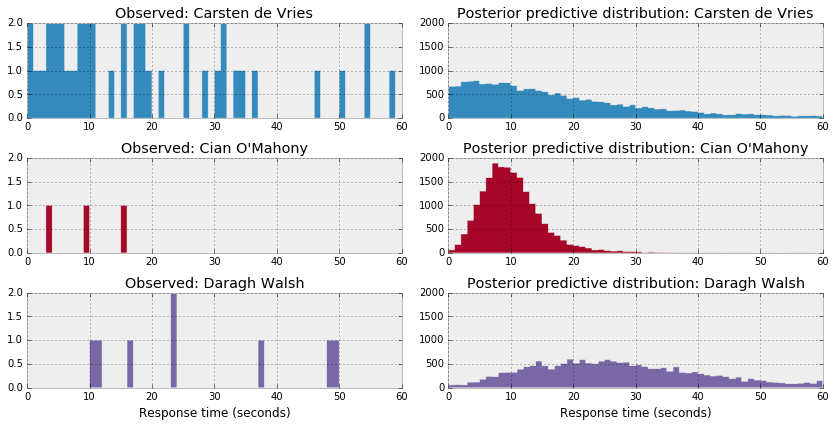

In [12]:
fig, axs = plt.subplots(3, 2, figsize=(12, 6))
axs = axs.ravel()
y_left_max = 2
y_right_max = 2000
x_lim = 60
ix = [3, 4, 6]

for i, j, p in zip([0, 1, 2], [0, 2, 4], participants[ix]):
    axs[j].set_title('Observed: %s' % p)
    axs[j].hist(messages[messages['prev_sender'] == p]['time_delay_seconds'].values, range=[0, x_lim], bins=x_lim, 
                histtype='stepfilled', color=colors[i])
    axs[j].set_ylim([0, y_left_max])
    
for i, j, p in zip([0, 1, 2], [1, 3, 5], participants[ix]):
    axs[j].set_title('Posterior predictive distribution: %s' % p)
    axs[j].hist(indiv_traces[p].get_values('y_pred'), range=[0, x_lim], bins=x_lim, histtype='stepfilled', color=colors[i])
    axs[j].set_ylim([0, y_right_max])
    
    
axs[4].set_xlabel('Response time (seconds)')
axs[5].set_xlabel('Response time (seconds)')

plt.tight_layout()

上面的例子展现了三个会话中各自的观测数据(左）和其对应的后验预测分布（右）的分布数据。正如图中展示的那样，后验预测分布在不同会话可以相当地不同。这个现象可以准确地反映出会话的特征，或者可以说明在小样本的情况下，后验预测分布会不准确。

如果我们组合这些后验预测分布模型，就得到了池化模型，我们可以期望它会和整体数据集的数据分布相似。让我们实现这个后验预测检测。

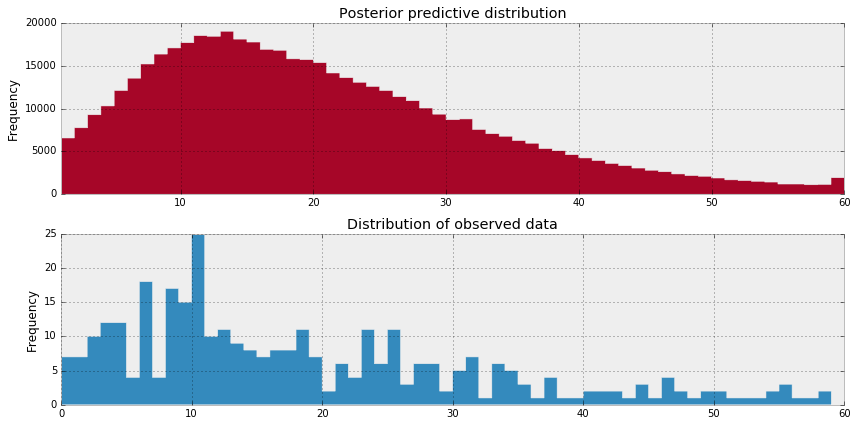

In [15]:
combined_y_pred = np.concatenate([v.get_values('y_pred') for k, v in indiv_traces.items()])

x_lim = 60
y_pred = trace.get_values('y_pred')

fig = plt.figure(figsize=(12, 6))
fig.add_subplot(211)

plt.hist(combined_y_pred, range=[0, x_lim], bins=x_lim, histtype='stepfilled', color=colors[1])
plt.xlim(1, x_lim)
plt.ylim(0, 20000)
plt.ylabel('Frequency')
plt.title('Posterior predictive distribution')

fig.add_subplot(212)
plt.hist(messages['time_delay_seconds'].values, range=[0, x_lim], bins=x_lim, histtype='stepfilled')
plt.xlim(0, x_lim)
plt.ylim(0, 25)
plt.ylabel('Frequency')
plt.title('Distribution of observed data')

plt.tight_layout()

从图中，我们确定了我们的预测。然而，我担心一些只有非常少量信息交流的会话会使得预测变得有高方差。一种减轻这个风险的方法是共享会话之间的信息，但是依旧对每个会话预测其$\mu_i$和$\alpha_i$，我们称这个为部分池化。

### Partial pooling
如池化的模型，部分池化模型对每个会话 $i$ 都有其对应的参数值。但是，这些参数通过超参数链接在一起。这个做法反映了我们的一个认知，即对每个会话的回应时间`response_time`实际上和其他会话都有相似性，这种相似性是由我个人的回应快慢的自然趋势产生的。

$$y_{ji} \sim NegBinomial(\mu_i, \alpha_i)$$

和前面的例子一样，我们对每个Negative Binomial分布计算其参数$\mu_i$和$\alpha_i$。我将会使用Gamma分布来表示$\mu$和$\alpha$的期望的分布，而不是用uniform分布。这个可以使我能引入更多先验知识到模型中，因为我确定地期望$\mu$和$\alpha$来自哪个分布。

首先，看看gamma分布长什么样子，它非常的灵活。

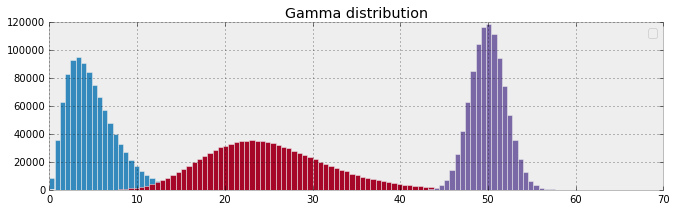

In [16]:
mu = [5, 25, 50]
sd = [3, 7, 2]

plt.figure(figsize=(11, 3))
plt.title('Gamma distribution')

with pm.Model() as model:
    for i, (j, k) in enumerate(zip(mu, sd)):
        samples = pm.Gamma('gamma_%s' % i, mu=j, sd=k).random(size=10**6)
        plt.hist(samples, bins=100, range=(0, 60), color=colors[i], alpha=1)
        
plt.legend('$\mu$ = %s, $\sigma$ = %s' % (mu[a], sd[a]) for a in [0, 1, 2])

部分池化模型可以被形式化表述为：

$$y_{ji} \sim NegBinomial(\mu_i, \alpha_i)$$
$$\mu_i = Gamma(\mu_\mu, \sigma_\mu)$$
$$\alpha_i = Gamma(\mu_\alpha, \sigma_\alpha)$$
$$\mu_\mu = Uniform(0, 60)$$
$$\sigma_\mu = Uniform(0, 50)$$
$$\mu_\alpha = Uniform(0, 10)$$
$$\sigma_\alpha = Uniform(0, 50)$$

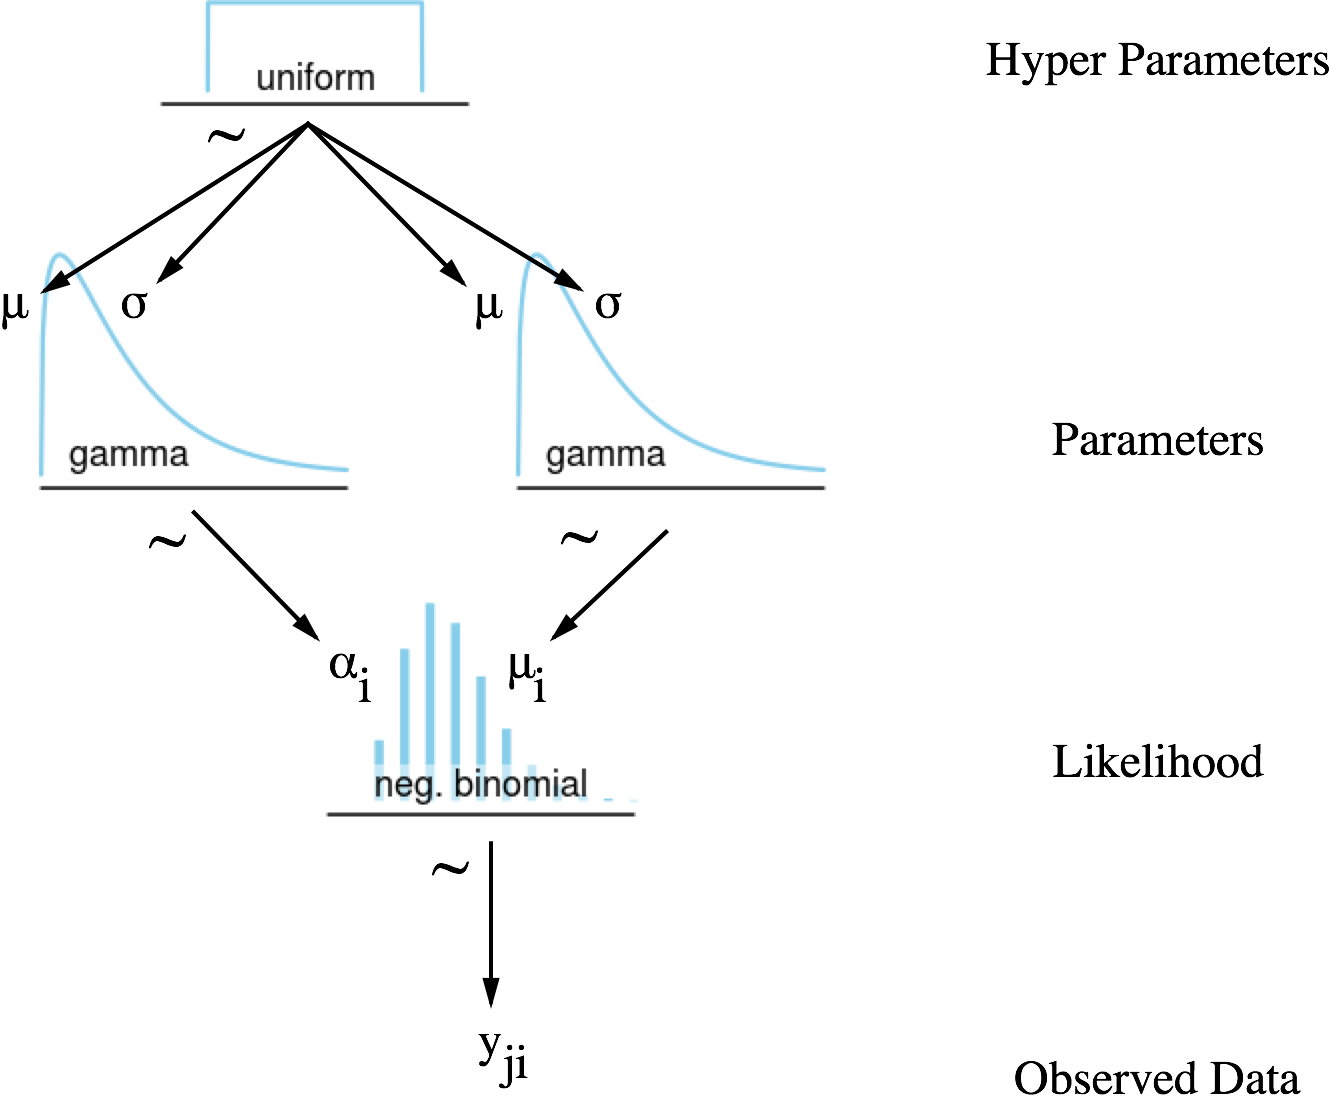

In [9]:
Image('graphics/dag neg poisson gamma hyper.png', width=420)

In [85]:
with pm.Model() as model:
    hyper_alpha_sd = pm.Uniform('hyper_alpha_sd', lower=0, upper=50)
    hyper_alpha_mu = pm.Uniform('hyper_alpha_mu', lower=0, upper=10)
    
    hyper_mu_sd = pm.Uniform('hyper_mu_sd', lower=0, upper=50)
    hyper_mu_mu = pm.Uniform('hyper_mu_mu', lower=0, upper=60)
    
    alpha = pm.Gamma('alpha', mu=hyper_alpha_mu, sd=hyper_alpha_sd, shape=n_participants)
    mu = pm.Gamma('mu', mu=hyper_mu_mu, sd=hyper_mu_sd, shape=n_participants)
    
    y_est = pm.NegativeBinomial('y_est', mu=mu[participants_idx],
                               alpha=alpha[participants_idx],
                               observed=messages['time_delay_seconds'].values)
    
    y_pred = pm.NegativeBinomial('y_pred', mu=mu[participants_idx],
                                alpha=alpha[participants_idx],
                                shape=messages['prev_sender'].shape)
    
#     y_est = pm.Poisson('y_est', mu=mu[participants_idx],
#                                observed=messages['time_delay_seconds'].values)
    
#     y_pred = pm.Poisson('y_pred', mu=mu[participants_idx],
#                                 shape=messages['prev_sender'].shape)
    
    start = pm.find_MAP()
    step = pm.Metropolis()
    hierarchical_trace = pm.sample(20000, step, progressbar=True)

         Current function value: 2185.903814
         Iterations: 239
         Function evaluations: 305
         Gradient evaluations: 292


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20500/20500 [1:31:48<00:00,  3.78it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000006117B358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000048DC60F0>]], dtype=object)

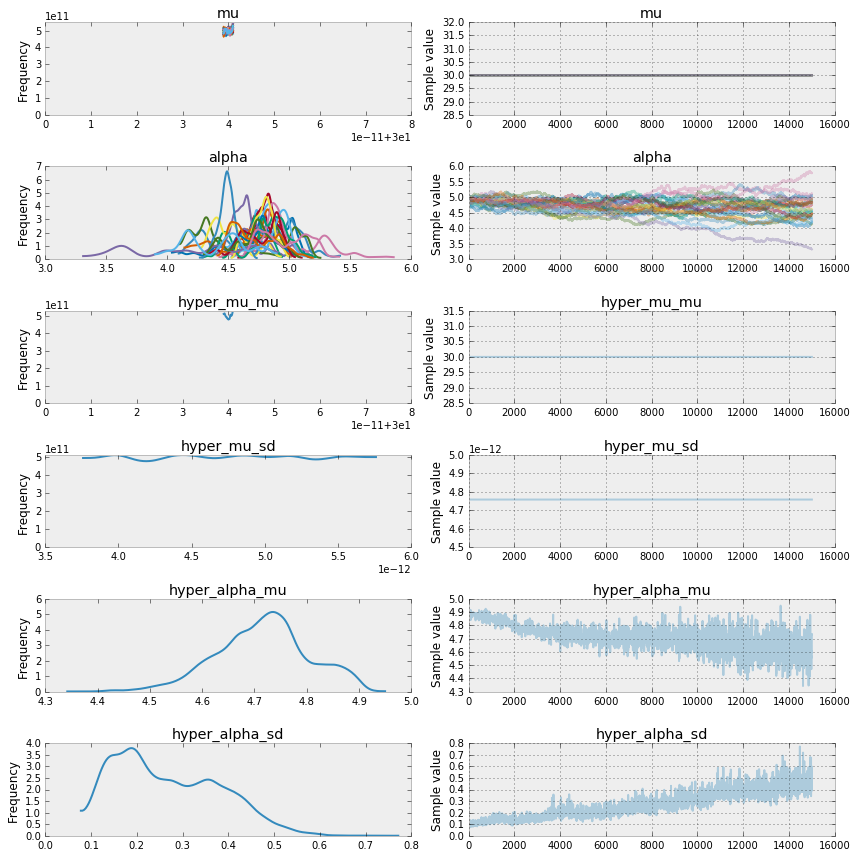

In [86]:
pm.traceplot(hierarchical_trace[5000:],
            varnames=['mu','alpha','hyper_mu_mu', 'hyper_mu_sd', 'hyper_alpha_mu', 'hyper_alpha_sd'])

可以看到对计算得到的$\mu$和$\alpha$有多张图。池化模型和部分池化模型的不同在于部分池化模型的参数($\mu_i$和$\alpha_i$)有一个超参数，它可以在所有会话间共享使用。这带来两个好处：
1. 会话间的信息共享，特别是对那些样本有限的会话，它们在优化其本身模型参数时，从其他会话那里“借来”知识。
2. 我们不但得到了关于每个会话的模型估计，还得到了包含所有会话的模型估计。

快速看下后验预测分布。

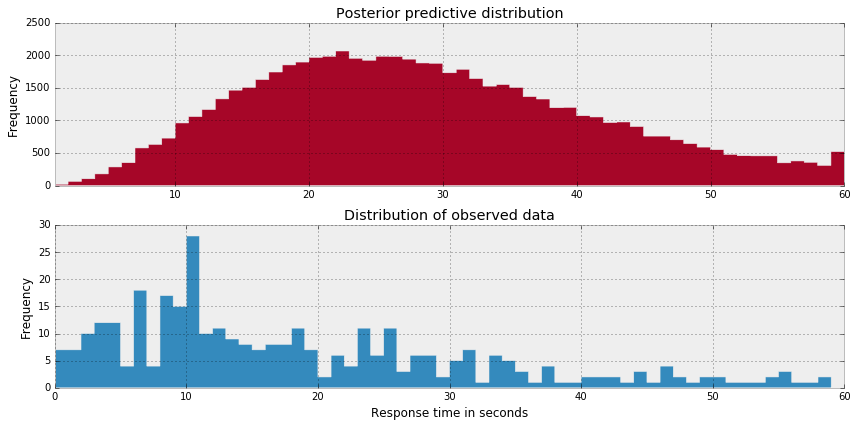

In [87]:
x_lim = 60
y_pred = hierarchical_trace.get_values('y_pred')[::100].ravel()

fig = plt.figure(figsize=(12,6))
fig.add_subplot(211)

plt.hist(y_pred, range=[0, x_lim], bins=x_lim, histtype='stepfilled', color=colors[1])
plt.xlim(1, x_lim)
plt.ylabel('Frequency')
plt.title('Posterior predictive distribution')

fig.add_subplot(212)
plt.hist(messages['time_delay_seconds'].values, range=[0, x_lim], bins=x_lim, histtype='stepfilled')
plt.xlabel('Response time in seconds')
plt.ylabel('Frequency')
plt.title('Distribution of observed data')

plt.tight_layout()

### Shrinkage effect: pooled vs hierarchical model
正如之前讨论的那样，部分池化模型对参数$\mu$和$\alpha$共享一个超参数。通过共享会话之间的信息，它的效果就是将所有的优化过程收缩的更紧凑，尤其是只有少量样本的会话。

这个收缩效果在下图中展示。你可以看到$\mu$和$\alpha$是如何通过超参数的作用而趋向于相互靠近的。

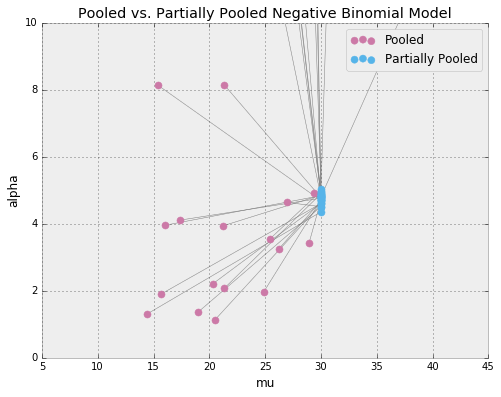

In [88]:
hier_mu = hierarchical_trace['mu'][500:].mean(axis=0)
hier_alpha = hierarchical_trace['alpha'][500:].mean(axis=0)
indv_mu = [indiv_traces[p]['mu'][500:].mean() for p in participants]
indv_alpha = [indiv_traces[p]['alpha'][500:].mean() for p in participants]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, xlabel='mu', ylabel='alpha',
                    title='Pooled vs. Partially Pooled Negative Binomial Model',
                    xlim=(5, 45), ylim=(0, 10))

ax.scatter(indv_mu, indv_alpha, color=colors[5], s=50, label='Pooled', zorder=3)
ax.scatter(hier_mu, hier_alpha, color=colors[6], s=50, label='Partially Pooled', zorder=4)

for i in range(len(indv_mu)):
    ax.arrow(indv_mu[i], indv_alpha[i], hier_mu[i] - indv_mu[i], hier_alpha[i] - indv_alpha[i], 
             fc='grey', ec='grey', length_includes_head=True, alpha=0.5, head_width=0)
    
ax.legend()

### Asking questions of the posterior
让我们开始利用贝叶斯统计派的一些优势方面——后验概率分布。与频率派技术不同，我们得到一个完整的后验分布而不仅仅是一个点估计值。在本质上，我们有一堆可以置信的参数估计值。这使我们能够以一种相当自然和直觉的方式提出一些问题。

#### 我将回应朋友消息在10秒内的几率？
要估计这个概率值，我们看看Brian Durcan和Paul Mullin's `response_time`各自的后验预测分布，看看有多少样本是小于10秒的。当我第一次接触这个技术时，我以为自己理解错了，因为它看起来过于简单了。

In [24]:
def participant_y_pred(person):
    """Return posterior predictive for person"""
    ix = np.where(participants == person)[0][0]
    return hierarchical_trace['y_pred'][1000:, ix]

In [43]:
print("Here are some samples from Timothy's posterior predictive distribution: \n %s" % participant_y_pred('Paul Mullin'))

Here are some samples from Timothy's posterior predictive distribution: 
 [ 5  5  5 ..., 23 23 23]


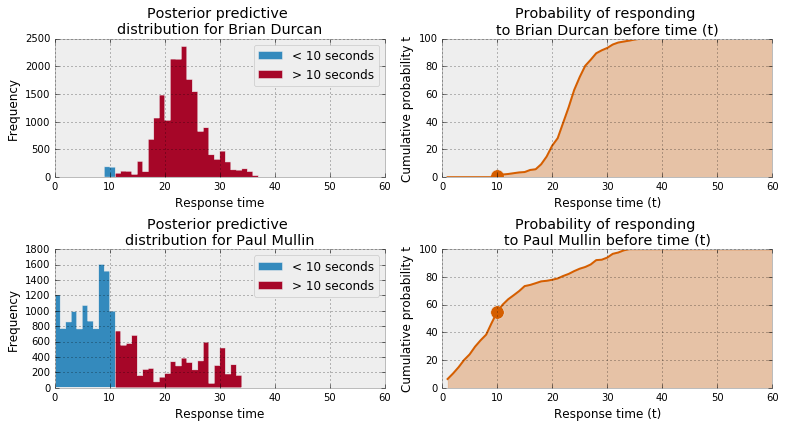

In [58]:
def person_plotA(person_name):
    ix_check = participant_y_pred(person_name) > 10
    plt.hist(participant_y_pred(person_name)[~ix_check], range=[0, x_lim], bins=x_lim, histtype='stepfilled', label='< 10 seconds')
    plt.hist(participant_y_pred(person_name)[ix_check], range=[0, x_lim], bins=x_lim, histtype='stepfilled', label='> 10 seconds')
    plt.title('Posterior predictive \ndistribution for %s' % person_name)
    plt.xlabel('Response time')
    plt.ylabel('Frequency')
    plt.legend()
    
def person_plotB(person_name):
    x = np.linspace(1, 60, num=60)
    num_samples = float(len(participant_y_pred(person_name)))
    prob_lt_x = [100*sum(participant_y_pred(person_name) < i) / num_samples for i in x]
    plt.plot(x, prob_lt_x, color=colors[4])
    plt.fill_between(x, prob_lt_x, color=colors[4], alpha=0.3)
    plt.scatter(10, float(100*sum(participant_y_pred(person_name) < 10)) / num_samples, s=180, c=colors[4])
    plt.title('Probability of responding \nto %s before time (t)' % person_name)
    plt.xlabel('Response time (t)')
    plt.ylabel('Cumulative probability t')
    plt.ylim(ymin=0, ymax=100)
    plt.xlim(xmin=0, xmax=60)
    
fig = plt.figure(figsize=(11,6))

fig.add_subplot(221)
person_plotA('Brian Durcan')

fig.add_subplot(222)
person_plotB('Brian Durcan')

fig.add_subplot(223)
person_plotA('Paul Mullin')

fig.add_subplot(224)
person_plotB('Paul Mullin')

plt.tight_layout()

我发现这套方法非常的直观和灵活。上图左边部分将后验预测分布以回应时间10秒为界切成两份。我们可以通过计算样本中少于10秒的比例得到概率值。

#### How do my friends pair off against each other?


In [46]:
def prob_persona_faster(persona, personb):
    return np.float(sum(participant_y_pred(persona) < participant_y_pred(personb))) / len(participant_y_pred(persona))

print("Probability that Tom is responded to faster than Andrew: {:.2%}".format(prob_persona_faster('Brian Durcan', 'Paul Mullin')))

Probability that Tom is responded to faster than Andrew: 15.98%


In [50]:
import itertools

# Create an empty dataframe
ab_dist_df = pd.DataFrame(index=participants, columns=participants, dtype=np.float)

# Populate each cell in dataframe with persona_faster_personb()
for a, b in itertools.permutations(participants, 2):
    ab_dist_df.ix[a, b] = prob_persona_faster(a, b)
    
# populate the diagnoal
for a in participants:
    ab_dist_df.ix[a, a] = 0.5

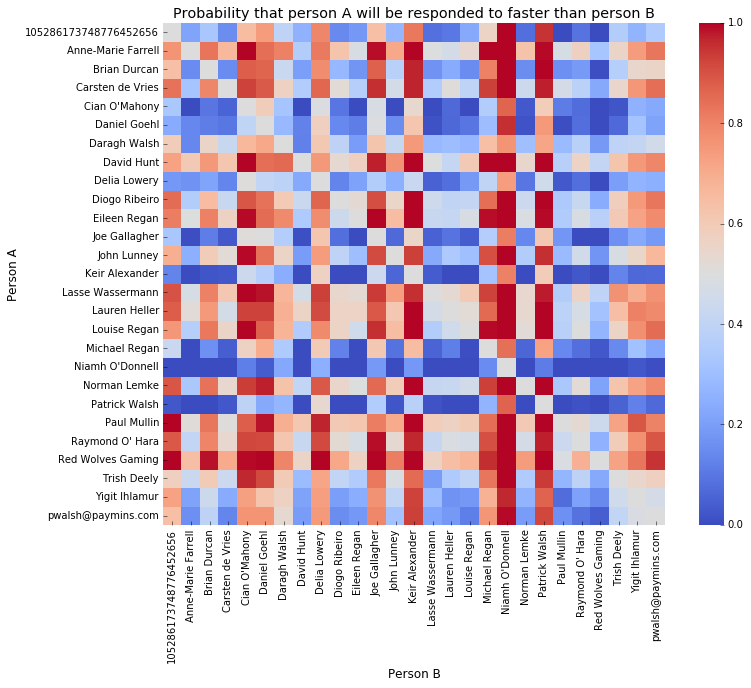

In [62]:
# Plot heatmap
f, ax = plt.subplots(figsize=(12, 9))
cmap = plt.get_cmap('coolwarm')
sns.heatmap(ab_dist_df, square=True, cmap=cmap)
plt.title('Probability that person A will be responded to faster than person B')
plt.ylabel('Person A')
plt.xlabel('Person B')

### References
1. [The Best Of Both Worlds: Hierarchical Linear Regression in PyMC3](http://twiecki.github.io/blog/2014/03/17/bayesian-glms-3/) by Thomas Wiecki

In [ ]:
# Apply pretty styles
from IPython.core.display import HTML

def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()